<a href="https://colab.research.google.com/github/elainedias16/AI/blob/main/Trab1_Elaine_Dias_Pires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

<h1><center><b>Primeiro Trabalho de Inteligência Artificial</b></center></h1>

<h1><center>Ciência da Computação</center></h1>
<h2><center>Inteligência Artificial - 2023/1</center></h2>



<h4><center>

  <p>
  Elaine Dias Pires </br>
  elaine.pires@edu.ufes.br </br>
  2020101903
  </p>

</center></h4>

</br>

<h5><center>Professor: Flávio Miguel Varejão</center></h5>

<br>

<br>

<br>

<br>

<br>

---



#Criação do Dataframe



A função abaixo foi feita utilizando os códigos disponibilizados no classroom. A única alteração realizada foi no subconjunto dos descritores, que foram reduzidos apenas para os descritores HU, devido ao final de matrícula.

In [ ]:
import pandas as pd

def create_dataframe():

  #Leitura dos dados para o pandas
  df = pd.read_csv('https://raw.githubusercontent.com/VitorBonella/PL-Dataset/main/dataset.csv',sep=";")
  df.set_index('id',inplace=True) #Transformando a coluna id no indice da tabela

  #Observem que a classe esta separada em duas colunas então devemos concatenadas para formar uma coluna só chamada classe
  df['classe'] = df['tipo_lampada'].str.replace(" ", "") + df['potencia'].astype(str)

  # Lista de Indices
  FOURIER = ['df01', 'df02', 'df03', 'df04','df05', 'df06', 'df07', 'df08', 'df09', 'df10']
  HU = ['i1', 'i2', 'i3', 'i4','i5', 'i6', 'i7']
  HARALICK = ['probmax', 'energia', 'entropia', 'contraste','homogeneidade', 'correlacao']
  ALL = FOURIER + HU + HARALICK

  # Verificar o tipo da coluna
  print(list(df[ALL].dtypes)) #o list(...) foi usado apenas para imprimir na vertical
  df[ALL].head(2)

  #Transformando os dados de string para float
  df[ALL] = df[ALL].apply(lambda x: x.str.replace(',', '.').astype(float), axis=1)
  print(list(df[ALL].dtypes))
  df[ALL].head(2)

  #Separando o subconjunto relativo ao último dígito da matrícula.
  X = df[HU]

  #Target
  y = df['classe']

  return X, y

X, y = create_dataframe()

# Array criado para armazenar os resultados dos classificadores.
# Posteriormente será utilizado para gerar a tabela com os resultados.
clf_results = []

# Array criado para armazenar os scores dos classificadores.
clf_scores = []

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]
[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


#Classificadores

##Classificador ZeroR

Para o classificador ZeroR será feito treino e teste com 3 rodadas de validação cruzada estratificada com 10 fold.


In [ ]:
import numpy as np
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


zR = DummyClassifier(random_state=11)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)
scores = cross_val_score(zR, X, y, cv=rkf, scoring='accuracy')

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores)))

print(mean, std, inf, sup)

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" %
       (inf, sup))


clf_results.append([mean, std, inf, sup])
clf_scores.append(scores)

0.16505747126436784 0.01088257506073069 0.16116326335092349 0.1689516791778122

Mean Accuracy: 0.17 Standard Deviation: 0.01
Accuracy Confidence Interval (95%): (0.16, 0.17)



##Classificador Bagging

Para os classificadores que precisam de ajustes nos hiperparâmetros, isto é, Bagging, AdaBoost, Random Forest e Heterogeneous Pooling será feito o procedimento de treinamento, validação e teste através de 3 rodadas de ciclos aninhados de validação e teste, com o ciclo interno de validação contendo 4 folds e o externo de teste com 10 folds.

A busca em grade (grid search) do ciclo interno considerará os
seguintes valores de hiperparâmetros para cada técnica de aprendizado:

Bagging: [n_estimators = 3, 9, 15, 21]

AdaBoost: [n_estimators = 3, 9, 15, 21]

RandomForest: [n_estimators = 3, 9, 15, 21]

HeterogeneousPooling: [n_samples = 1, 3, 5, 7]

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats

#Definindo o classificador Bagging
ba =  BaggingClassifier(random_state=11)

#Normalização
scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', ba)])

#Busca em grade conforme a especificação
grade={'estimator__n_estimators': [ 3, 9, 15, 21]}
gs = GridSearchCV(estimator=pipeline, param_grid = grade,
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)

scores = cross_val_score(gs, X, y, scoring='accuracy',
                         cv = rkf)
# print(scores)
mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean,
                               scale=std/np.sqrt(len(scores)))
print(mean, std, inf, sup)

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" %
       (inf, sup))


clf_results.append([mean, std, inf, sup])
clf_scores.append(scores)

0.48647509578544057 0.10406190222094655 0.4492377065778836 0.5237124849929976

Mean Accuracy: 0.49 Standard Deviation: 0.10
Accuracy Confidence Interval (95%): (0.45, 0.52)



##Classificador AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats

#Definindo o classificador Ada Boost
aB = AdaBoostClassifier(random_state=11)

#Normalização
scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', aB)])

#Busca em grade
grade={'estimator__n_estimators': [ 3, 9, 15, 21]}
gs = GridSearchCV(estimator=pipeline, param_grid = grade,
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)

scores = cross_val_score(gs, X, y, scoring='accuracy',
                         cv = rkf)

# print(scores)
mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean,
                               scale=std/np.sqrt(len(scores)))
print(mean, std, inf, sup)
print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" %
       (inf, sup))

clf_results.append([mean, std, inf, sup])
clf_scores.append(scores)

0.2649425287356321 0.021173046113171473 0.2573659907135642 0.27251906675770005

Mean Accuracy: 0.26 Standard Deviation: 0.02
Accuracy Confidence Interval (95%): (0.26, 0.27)



##Classificador Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Definindo o classificador RandomForest
rF = RandomForestClassifier(random_state=11)

#Normalização
scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', rF)])

#Busca em grade
grade={'estimator__n_estimators': [3, 9, 15, 21]}
gs = GridSearchCV(estimator=pipeline, param_grid = grade,
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)

scores = cross_val_score(gs, X, y, scoring='accuracy',
                         cv = rkf)

# print(scores)
mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean,
                               scale=std/np.sqrt(len(scores)))

print(mean, std, inf, sup)
print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" %
       (inf, sup))

clf_results.append([mean, std, inf, sup])
clf_scores.append(scores)

0.45831417624521076 0.10144459428883845 0.4220133614425402 0.4946149910478813

Mean Accuracy: 0.46 Standard Deviation: 0.10
Accuracy Confidence Interval (95%): (0.42, 0.49)



##Classificador Heterogeneous Pooling

In [ ]:
from sklearn.utils.extmath import check_random_state
from sklearn.base import BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

from collections import Counter
import numpy as np
from builtins import max

class HeterogeneousPooling(BaseEstimator):
  def __init__(self, n_samples=1):
        super().__init__()
        self.n_samples = n_samples
        self.hp_comb= []
        self.predict_list = []

  def fit(self, X_train, y_train):
    #Armazenando as frequências em ordem decrescente
    self.frequency_classes = y_train.value_counts().index.tolist()

    knn = KNeighborsClassifier()
    dT = DecisionTreeClassifier(random_state=11)
    gNB = GaussianNB()

    random_state = 0
    for i in range(0, self.n_samples):
      if( i == 0):
        self.hp_comb.append(knn.fit(X_train, y_train))
        self.hp_comb.append(dT.fit(X_train, y_train))
        self.hp_comb.append(gNB.fit(X_train, y_train))

      else:
        new_X_train, new_y_train = resample(X_train, y_train, replace=True,random_state=check_random_state(random_state))
        self.hp_comb.append(knn.fit(new_X_train, new_y_train))
        self.hp_comb.append(dT.fit(new_X_train, new_y_train))
        self.hp_comb.append(gNB.fit(new_X_train, new_y_train))
        random_state += 1


  def predict(self, X_test):
    predicted_class = []
    predicted_class_tranposed = []

    #Classificação individual
    for clf in self.hp_comb:
      predicted_class.append(clf.predict(X_test)) #Cada linha é um classificador do combinado e as colunas são as predições

    #Passando as predições para as linhas para ficar mais fácil de iterar
    predicted_class_transposed = np.transpose(predicted_class)

    #Contando quantas vezes cada classe foi selecionada e obtendo as mais votadas
    most_voted_classes = []
    index = 0
    for line in predicted_class_transposed:
      count = Counter(line)
      qtd_max = max(count.values())
      most_voted_classes.append([])
      for key,value in count.items():
        if(value == qtd_max):
          most_voted_classes[index].append(key)
      index  += 1

    #Verificação da frequência, pois pode haver mais de uma classe mais votada
    for i in range(0, len(most_voted_classes)):
      if len(most_voted_classes[i]) > 1:
        for j in range(0, len(self.frequency_classes)):
          if(self.frequency_classes[j] in most_voted_classes[i]):
            self.predict_list.append(self.frequency_classes[j])
            break
      else:
        self.predict_list.append(most_voted_classes[i][0])

    return self.predict_list



hP = HeterogeneousPooling()

# #Normalização
scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', hP)])

#Busca em grade
grade={'estimator__n_samples': [1, 3, 5, 7]}
gs = GridSearchCV(estimator=pipeline, param_grid = grade,
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=36851234)

scores = cross_val_score(gs, X, y, scoring='accuracy',
                         cv = rkf)

# print(scores)
mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean,
                               scale=std/np.sqrt(len(scores)))

print(mean, std, inf, sup)
print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" %
       (inf, sup))

clf_results.append([mean, std, inf, sup])
clf_scores.append(scores)

0.3494252873563219 0.08052269023106909 0.320611142196766 0.37823943251587777

Mean Accuracy: 0.35 Standard Deviation: 0.08
Accuracy Confidence Interval (95%): (0.32, 0.38)



#Resultados






##Tabela de Média, Desvio Padrão, Limite Inferior e Superior

In [ ]:
import pandas as pd

clf = ['ZR', 'BA', 'AB', 'RF', 'HP']

df_results = pd.DataFrame(clf_results, columns=[ 'Média', 'Desvio Padrão',
                           'Limite Inferior', 'Limite Superior'],)

df_results.insert(0, "Método", clf, True)

df_results

,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,ZR,0.165057,0.010883,0.161163,0.168952
1,BA,0.486475,0.104062,0.449238,0.523712
2,AB,0.264943,0.021173,0.257366,0.272519
3,RF,0.458314,0.101445,0.422013,0.494615
4,HP,0.349425,0.080523,0.320611,0.378239


##Boxplot

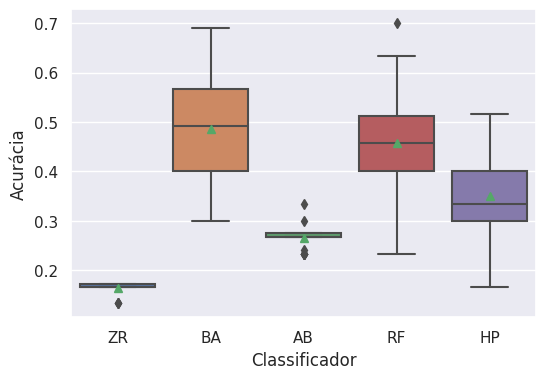

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_list = []
for index, value in enumerate(clf_scores):
  df_list.append(pd.DataFrame(value, columns=['Acurácia']).assign(Classificador=clf[index]))

df_concat = pd.concat(df_list)
sns.set(rc = { 'figure.figsize' : (6, 4)})
out = sns.boxplot(data = df_concat, x = 'Classificador', y = 'Acurácia', showmeans=True);

##Tabela pareada p-values

In [ ]:
from scipy.stats import ttest_rel, wilcoxon

size = len(clf_scores)
matrix_p_values = np.zeros((size, size)).tolist()

for i_index, i in enumerate(clf_scores):
  for j_index, j in enumerate(clf_scores):
    if(i_index == j_index):
      matrix_p_values[i_index][j_index] = clf[i_index]
      continue
    else:
      statistic, p_value = ttest_rel(i, j) #Teste Pareado
      matrix_p_values[i_index][j_index] = p_value

      statistic, p_value = wilcoxon(i, j, method = 'approx')
      matrix_p_values[i_index][j_index] = p_value

df_p_values = pd.DataFrame(matrix_p_values)
df_p_values

,0,1,2,3,4
0,ZR,0.000002,0.000001,0.000002,0.000002
1,0.000002,BA,0.000002,0.140056,0.000005
2,0.000001,0.000002,AB,0.000002,0.00011
3,0.000002,0.140056,0.000002,RF,0.000013
4,0.000002,0.000005,0.00011,0.000013,HP
